In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from random import choices
import sympy
from sympy import Matrix
from sympy import fraction
from IPython.display import display, Markdown

In [2]:
def var(v):
    return sympy.symbols(v)

In [3]:
a = [2, 1, 1, 0, 3, 1, 0, 0, 4] #upper triangle 2*3*4 = 24
b = [1, 0, 0, 0, 1, 0, 0, 0, 1] #identity I = 1
c = [75, 36, 94, 93, 52, 8, 67, 57, 15, 3, 49, 61, 51, 26, 11, 23, 6, 63, 92, 79, 10, 16, 42, 66, 95] #5x5
d = [1, 6, 4, 2, 4, -1, -1, 2, 5] #dne inverse = 0
p = [1/2, 1/2, 0, 1/2, 1/2, 0, 0, 0, 1] #projection matrix P^2 = P
pe = [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1] #permutation matrix P*P.T = P.T*P = P
e = [1, 1, 1, 1, 2, 2, 1, 2, 3]
v = [var('x%d' % i) if i%(5+1)==0 else 0 for i in range(5**2)] #diagonal variable matrix: D = prod {diagonals}
v2 = [var('x%d' % i) for i in range(3**2)] #full variable matrix
F = [1, 2, 3, 2, 2, 3, 3, 3, 3]
s = [3, -2, 4, -2, 6, 2, 4, 2, 3]
o = [3, 0, 0, 0, 0, 2, 0, 1, 0]
r = [8,3,0,0,5,0,6,0,5,3,
6,7,9,5,7,5,8,0,4,5,
1,2,9,5,7,3,5,0,5,6,
8,5,0,6,8,7,0,2,7,5,
6,8,4,4,4,4,5,8,5,6,
9,2,1,2,1,8,3,9,4,5,
6,4,6,2,3,2,6,3,7,9,
4,2,9,9,2,6,4,2,3,0]

c_1 = 3
c_2 = 5
c_3 = 4
c_4 = 8

In [4]:
class sq_matrix:
    def __init__(self, m, cols, title="A"):
        self.m = m
        self.cols = cols
        self.title = title
        self.m_T = self.T(self.m[:], self.cols)
        self.m_ID = [1 if i%(self.cols+1)==0 else 0 for i in range(self.cols**2)]
    
    '''
    Matrix defs.
    '''
    
    #get sq_matrix 2d index
    def get_mat_indx(self, i, j):
        return self.mat_indx(self.m, self.cols, i, j)
    
    #get matrix 2d index
    def mat_indx(self, m, cols, i, j):
    #gets content of a_ij of nxn matrix A
    #subtract by 1 to get math-like form, st. a11 is the top left most content
        i -= 1
        j -= 1
        return m[i*cols + j]
    
    #swap entry of a matrix
    def swap_entry(self, m, cols, i_1, j_1, i_2, j_2):
    #for M nxn, does m_i1j1 => mi2j2
        temp = self.mat_indx(m, cols, i_1, j_1)
        m[(i_1-1)*cols+(j_1-1)] = self.mat_indx(m, cols, i_2, j_2)
        m[(i_2-1)*cols+(j_2-1)] = temp
        
    
    #get transpose of sq_matrix
    def get_T(self):
        return self.T(self.m, self.cols)
    
    #gets transpose of matrix
    def T(self, m, cols):
        for i in range(1, cols+1):
            for j in range(i, cols+1):
                self.swap_entry(m, cols, i, j, j, i)
        
        return m
    
    '''
    Row/Col. handling
    '''
    
    #get row vector
    def get_row(self, r):
        if r > self.cols or r < 1:
            raise ValueError(f"Row must be in matrix: Given {r} for ({self.cols}x{self.cols}) matrix")
            
        return self.to_matrix()[r-1]
    
    #get row indexes
    def get_row_elems(self, r):
        if r > self.cols or r < 1:
            raise ValueError(f"Row must be in matrix: Given {r} for ({self.cols}x{self.cols}) matrix")
        r -= 1
        
        #start at first elem of row, ie row 2 for 3x3 is: [2*3]
        st = r*self.cols
        return [i for i in range(st, st+self.cols)]
    
    #get col. indexes
    def get_col_elems(self, c):
        if c > self.cols or c < 1:
            raise ValueError(f"Col. must be in matrix: Given {r} for ({self.cols}x{self.cols}) matrix")
        c -= 1
        
        #start at first elem of row, ie row 2 for 3x3 is: [2*3]
        st = c
        return [st+i*self.cols for i in range(0, self.cols)]
        
    #gets col. vector
    def get_col(self, c):
        if c > self.cols or c < 1:
            raise ValueError(f"Col. must be in matrix: Given {r} for ({self.cols}x{self.cols}) matrix")
        
        self.get_T()
        ans = self.to_matrix()[c-1]
        self.get_T()
        return ans
    
    '''
    Determinant
    '''
    
    #gets minor M_ij of a matrix
    def minor(self, m, cols, i, j):
        #gets M_ij by adding a_ij st

        m_n = []
        mtx = sq_matrix(m, cols)

        dels = mtx.get_row_elems(i)+mtx.get_col_elems(j)
        
        for x in range(cols*cols):
            if x not in dels:
                m_n.append(m[x])
                
        

        return self.det(m_n, cols-1)
    
    #gets determinant of sq_matrix
    def get_det(self, i=1):
        return self.det(self.m, self.cols)
    
    #get determinant of a matrix
    def det(self, m, cols, i=1):
        #find determinant of nxn matrix via cofactoring
        if cols < 1:
            return "must have > 1 col"

        #base case 2x2 matrix
        #print(m)
        if cols == 2:
            return m[0]*m[3]-m[1]*m[2]

        #sum of a ij * cij, for j = 1 -> n
        M_ij = lambda i,j: self.minor(m, cols, i, j)
        C_ij = lambda i,j: (-1)**(i+j) * M_ij(i, j)
        Cof_ij = lambda i,j: self.mat_indx(m, cols, i, j)*C_ij(i, j)

        return sum([Cof_ij(i, j) for j in range(1, cols+1)])
    
    '''
    Inverse of matrix
    '''
    
    def get_inverse(self, sep=False):
        return self.inverse(self.m, self.cols, sep)
    
    def inverse(self, m, cols, sep=False):
        det = self.det(m, cols)
        
        if not det:
            return sq_matrix([0],1)
        
        if cols==2:
            return det, sq_matrix([m[3], -m[1], -m[2], m[0]],2)
        
        cof_mat = cols**2*[0]
        
        #adj(A) = Cof^T = ((-1)^(i+j) M_ji)
        
        Cof_ij = lambda i,j: (-1)**(i+j) * self.minor(m, cols, i, j)
                
        for row in range(cols):
            for col in range(cols):
                cof_mat[row*cols + col] = Cof_ij(col+1, row+1)
        

        cof_mat = sq_matrix(cof_mat, cols)
        
        if not sep:
            cof_mat.m = [x / det if x!=0 else 0 for x in cof_mat.m]
            return cof_mat
        
        
        return det, cof_mat
    
    '''
    Eigenvalues
    '''
    
    #gets eq. det(sq_matrix - λ*I)
    def eigenvalues_lhs_mat(self):
        lmb_ID_a = sq_matrix(self.m[:], self.cols)
        lmb_ID_b = sq_matrix(self.m_ID[:], self.cols)
        lmb_ID_b.scalar(sympy.symbols('λ'))
        
        return (lmb_ID_a - lmb_ID_b).m
    
    def eigenvalues_lhs(self):
        return self.det(self.eigenvalues_lhs_mat(), self.cols)
    
    #gets eigen values by using lhs = 0 via sympy solve
    def get_eigenvalues(self,  no_imag=True, rational=False):
        res = sympy.solve(self.eigenvalues_lhs(), sympy.symbols('λ'))
        
        if rational:
            res = [sympy.Rational(i) for i in res]
        else:
            res = [sympy.N(i) for i in res]
        reals = []
        imags = []
        
        for i in res:
            if i.is_real:
                reals.append(float(i))
        
        for i in res:
            if not i.is_real:
                imags.append(i)
        
        if no_imag:
            return reals
        
        return reals, imags
    
    def get_trace(self):
        return self.trace(self.m, self.cols)
    
    def trace(self, m, cols):
        mat = sq_matrix(m, cols)
        
        return sum([i**2 for i in mat.get_eigenvalues()])
    
    '''
    Eigenvectors
    '''
    def get_eigenvectors(self):
        pass
    
    '''
    RREF
    '''
    
    #does RREF on sq_matrix
    def get_RREF(self):
        return self.RREF(self.m, self.cols)
    
    #does RREF via sympy rref
    def RREF(self, m, cols):
        mat = sq_matrix(m, cols)
        mtx = mat.to_matrix()
        mtx = Matrix(mtx)
        rref_mtx = list(mtx.rref()[0])
        res = sq_matrix(rref_mtx, cols)
        
        return res
    
    def get_pivots(self):
        return self.pivots(self.m, self.cols)
    
    def pivots(self, m, cols):
        rref = self.RREF(m, cols)
        mtx = rref.to_matrix()
        pivots = []
        for i in mtx:
            temp = list(filter(lambda x: x!=0, i))
            if temp:
                pivots.append(temp[0])
        
        return pivots
    
    def get_rank(self):
        return self.rank(self.m , self.cols)
    
    def rank(self, m, cols):
        return len(self.pivots(m, cols))
    
    def full_rank(self):
        return self.get_rank()==self.cols
            
    '''
    Cramer's Rule
    '''
    
    #finds solution x, for Ax = b, via cramer's rule
    def cramer(self, b):
        if len(b) != self.cols:
            raise ValueError(f"vector must have same length as matrix cols: Given ({len(b)}), ({self.cols}x{self.cols})")
        
        #x_i = det(A_i)/det(A)
        det = self.get_det()
        
        cols = [self.get_col(i) for i in range(1, self.cols+1)]
        
        A_i = [i[:] for i in [cols]*self.cols]
        temp = []
        
        #generate A_i's
        for i in range(len(A_i)):
            A_i[i][i] = b
            for j in A_i[i]:
                temp += j
            A_i[i] = temp
            temp = []
            
            A_i[i] = sq_matrix(sq_matrix(A_i[i], self.cols).m_T, self.cols)
            
        dets = [self.det(i.m, self.cols) for i in A_i]
        
        res = [d/det for d in dets]
            
        return res
    
    
    
    '''
    Check Matrix Type
    '''
    
    #checks if matrix is invertible
    def inv(self):
        return self.get_det()!=0
    
    #checks if matrix is identity
    def iden(self):
        return self.get_det()==1
    
    #check if sq_matrix is symmetric
    def sym(self):
        return self.m==self.m_T
    
    #check if sq_matrix is proj. matrix
    def proj(self):
        return self*self==self
    
    #check if orthogonal matrix
    def ortho(self):
        tmp = sq_matrix(self.m_T, self.cols)
        tmp_id = sq_matrix(self.m_ID, self.cols)
        return tmp*self == self*tmp == tmp_id  
    
    def perm(self):
        for i in self.m:
            if i not in [0, 1] or i<0: return False
        return self.ortho()
    
    '''
    Operators
    '''
    
    #dot product of two vectors
    def dot(self, v1, v2):
        return sum([v1[i]*v2[i] for i in range(self.cols)])
    
    #matrix mul. of two matrices
    def __mul__(self, other):
        if self.cols != other.cols:
            raise ValueError(f"Both matrices must have same size: Given ({self.cols}x{self.cols}), ({other.cols}x{other.cols})")
        
        m_tmp = []
        
        for row in range(1, self.cols+1):
            for col in range(1, self.cols+1):
                res = self.dot(self.get_row(row), other.get_col(col))
                if res % 1 == 0:
                    res = int(res)
                m_tmp.append(res)
        
        return sq_matrix(m_tmp, self.cols)
    

    #multiplies matrix by scalar
    def scalar(self, s):
        self.m = [x*s if x!=0 else 0 for x in self.m]
        self.update()
    
    #add two matrices together
    def __add__(self, other):
        if self.cols != other.cols:
            raise ValueError(f"Both matrices must have same size: Given ({self.cols}x{self.cols}), ({other.cols}x{other.cols})")
        
        return sq_matrix([self.m[i]+other.m[i] for i in range(self.cols*self.cols)], self.cols)
    
    #sub two matrices together
    def __sub__(self, other):
        if self.cols != other.cols:
            raise ValueError(f"Both matrices must have same size: Given ({self.cols}x{self.cols}), ({other.cols}x{other.cols})")
        
        return sq_matrix([self.m[i]-other.m[i] for i in range(self.cols*self.cols)], self.cols)
    
    #checks if self matrix == other matrix
    def __eq__(self, other):
        return self.m==other.m
    
    #updates m_T
    def update(self):
        self.m_T = self.T(self.m[:], self.cols)
    
    '''
    Printing
    '''
    
    #generates summary of matrix
    def summary(self):
        start = time.time()
        transp = sq_matrix(self.m_T, self.cols)
        rref = self.get_RREF()
        eigenvals = self.get_eigenvalues(False)
        
        print(self.cols*"-----")
        print(f"{self.title} ({self.cols}x{self.cols}):")
        
        self.print_matrix()
        
        print(f"{self.title}.T:")
        
        
        transp.print_matrix()
        
        print(f"{self.title}^-1:")
        
        if not self.inv():
            print("Matrix not invertible")
        else:
            self.print_inverse()
            
        print(f"{self.title}_RREF:")
        
        rref.print_matrix()
        
        
        print(f"\nDet: {self.get_det()} | Exists A^-1: {self.inv()} | Is I_{self.cols}: {self.iden()} \n")
        print(f"Symmetric: {self.sym()} | Projection: {self.proj()} | Orthogonal: {self.ortho()} | Permutation: {self.perm()} \n")
        
        print(f"Real Eigenvalues: {eigenvals[0]}")
        print(f"Complex Eigenvalues: {eigenvals[1]} \n")
        
        print(f"Rank: {self.get_rank()} | Full Rank: {self.full_rank()}")
        print(self.cols*"-----")
        
        end = time.time()
        elp = end-start
        print(f"took {round(elp*1000,3)}ms")
    
    #returns 2d matrix rep. of 1d matrix
    def to_matrix(self):
        return [[self.get_mat_indx(row, col) for col in range(1, self.cols+1)] for row in range(1, self.cols+1)]
        
    
    #prints 2d matrix rep. via latex md
    def to_latex(self):
        #for row in range(self.cols):
        #    print(self.to_matrix()[row])
        bls = chr(92)   
        
        res = bls + "begin{bmatrix}"
        for row in range(1, self.cols+1):
            for ele in self.get_row(row):
                res += f"{ele} &"
            res = res[:-1] + 2*bls
        res = res[:-2] + bls+"end{bmatrix}"
        return res
            
    
    def print_matrix(self):
        display(Markdown(self.to_latex()))
        
            
    def print_inverse(self):
        res = self.get_inverse(True)
        display(Markdown(f"$\\frac{1}{ {res[0]} } * $"))
        res[1].print_matrix()
    
    def get_heatmap(self, cm='binary', interp = 'nearest', xlims=None, ylims=None):
        self.heatmap(self.m, cm, interp, xlims, ylims)
        
    def heatmap(self, m, cm='binary', interp = 'nearest', xlims=None, ylims=None):
        if xlims != None:
            plt.xlim([xlims[0],xlims[1]])
        
        if ylims != None:
            plt.ylim([ylims[0],ylims[1]])
            
        np_m = np.matrix(sq_matrix(m[:], self.cols).to_matrix())
        plt.imshow(np_m, cmap=cm, interpolation=interp)
        plt.show()
    
    #prints 2d rep. of matrix via print(sq_matrix)
    def __str__(self):
        self.print_matrix()
        return ""

In [5]:
class gen_sq_matrix(sq_matrix):
    def __init__(self):
        self.m = [0,0,0,0]
        self.cols = 2
        self.title = "A"
        self.update()
        
    def update(self):
        self.m_T = self.T(self.m[:], self.cols)
        
    def to_mat(self):
        return sq_matrix(self.m, self.cols, self.title)
    
    def I(self, n=None):
        if n==None or n < 2: n = self.cols
        self.m = [1 if i%(n+1)==0 else 0 for i in range(n**2)]
        self.cols = n
        self.update()
        
    def full_num(self, num, n=None):
        if n==None or n < 2: n=self.cols
        self.m = n**2*[num]
        self.cols = n
        self.update()
        
    def empty(self, n=None):
        self.full_num(0, n)
        self.update()
        
    def ones(self, n=None):
        self.full_num(1, n)
        self.update()
        
    def scalar(self, s):
        self.m = [x*s if x!=0 else 0 for x in self.m]
        self.update()
        
    def gauss(self, amp, sigs, mus):
        self.fapply_2d(lambda e_i, x, y: amp*np.exp(-( ((x-mus[0])**2/(2*sigs[0])) + ((y-mus[1])**2/(2*sigs[1])))))
        
    def fapply_1d(self, f):
        self.m = [f(self.m[x], x) for x in range(self.cols**2)]
        self.update()
    
    def fapply_2d(self, f):
        for row in range(self.cols):
            for col in range(self.cols):
                self.m[row*self.cols + col] = f(self.m[row*self.cols + col], row+1, col+1)
        self.update()
        

In [6]:
class chem_balance(sq_matrix):
    def __init__(self, r1, r2):
        #r1 = reactant, r2 = reaction
        #Element: (element, #)
        #Compound [Element, ...]
        #Reactant/Reaction = [Compound, ...]
        self.r1 = r1
        self.r2 = r2
        self.contains = self.contents()
        self.num_elems = len(self.contains)
        self.elems = list(self.contains.keys())
        
    def contents(self):
        dic = {}
        for comp in self.r1+self.r2:
            for elem in comp:
                #print(elem)
                key = elem[0]
                val = elem[1]
                if elem[0] in dic:
                    dic[key][0] += 1
                    dic[key][1] += val
                else:
                    dic[key] = [1, val]
                    
        return dic
    
    def make_rows(self):
        rows = []

        for ele, comp in enumerate(self.r1+self.r2):
            r = []
            for indx, i in enumerate(self.elems):
                udp = False
                for elem in comp:
                    key = elem[0]
                    val = -elem[1] if ele >= len(self.r1) else elem[1]
                    if key==i:
                        r.append(val)
                        udp = True
                
                if not udp:
                    r.append(0)
            
            rows.append(r)
        
        return rows
    
    def to_mat(self):
        rows = self.make_rows()
        
        diff = len(rows)-len(rows[0])
        if(len(rows) > len(rows[0])):
            for i in rows:
                i.append([0]*diff)
        if(len(rows) < len(rows[0])):
            for i in range(diff):
                rows.append([0]*len(rows[0]))
            
        
        
        mat = []
        for i in rows:
            mat += i
        
        mat_T = sq_matrix(mat, len(rows)).m_T
        res = sq_matrix(mat_T, len(rows))
        return res
    
    def balance(self):
        res = Matrix(self.to_mat().to_matrix()).nullspace()[0]
        
        denoms = [fraction(i)[1] for i in res]
        lcm = np.lcm.reduce(denoms)
        return lcm*res
    
    def latex_result(self):
        bal = self.balance()
        res = ""
        for index, comp in enumerate(self.r1+self.r2):
            res = res + "" + str(bal[index])
            for elem in comp:
                key = elem[0]
                val = elem[1]
                res = res + str(key) + "_" + str(val)
            
            if index==len(self.r1)-1: res = res + "\\rightarrow"
            if index!=len(self.r1+self.r2)-1 and index!=len(self.r1)-1: res = res + "+"
            
        display(Markdown("$" + res + "$"))
        
        
    def __str__(self):
        for i in self.r1:
            print(i)
            
        for j in self.r2:
            print(j)
        return ""
        

In [13]:
ra1 = [("P", 1), ("Cl", 5)], [("H", 2), ("O", 1)]
ra2 = [("H", 3), ("P", 1), ("O", 4)], [("H", 1), ("Cl", 1)]
#rb1 = [("N", 2)], [("H", 2)]
#rb2 = [("N", 1), ("H", 3)], []
#print(ra1)
#print(rb1)
M = chem_balance(ra1, ra2)

M.latex_result()

$1P_1Cl_5+4H_2O_1\rightarrow1H_3P_1O_4+5H_1Cl_1$

In [52]:
rot = [sympy.cos(var("x")), -sympy.sin(var("x")), sympy.sin(var("x")), sympy.cos(var("x"))]
M = sq_matrix(rot, 2)
M.summary()

----------
A (2x2):


\begin{bmatrix}cos(x) &-sin(x) \\sin(x) &cos(x) \end{bmatrix}

A.T:


\begin{bmatrix}cos(x) &sin(x) \\-sin(x) &cos(x) \end{bmatrix}

A^-1:


$\frac1{sin(x)**2 + cos(x)**2} * $

\begin{bmatrix}cos(x) &sin(x) \\-sin(x) &cos(x) \end{bmatrix}

A_RREF:


\begin{bmatrix}1 &0 \\0 &1 \end{bmatrix}


Det: sin(x)**2 + cos(x)**2 | Exists A^-1: True | Is I_2: False 

Symmetric: False | Projection: False | Orthogonal: False | Permutation: False 

Real Eigenvalues: []
Complex Eigenvalues: [exp(-I*x), exp(I*x)] 

Rank: 2 | Full Rank: True
----------
took 565.649ms


In [10]:
M = gen_sq_matrix()
M.ones(3)
M.fapply_1d(lambda e, i: i)
M = M.to_mat()
M.summary()

---------------
A (3x3):


\begin{bmatrix}0 &1 &2 \\3 &4 &5 \\6 &7 &8 \end{bmatrix}

A.T:


\begin{bmatrix}0 &3 &6 \\1 &4 &7 \\2 &5 &8 \end{bmatrix}

A^-1:
Matrix not invertible
A_RREF:


\begin{bmatrix}1 &0 &-1 \\0 &1 &2 \\0 &0 &0 \end{bmatrix}


Det: 0 | Exists A^-1: False | Is I_3: False 

Symmetric: False | Projection: False | Orthogonal: False | Permutation: False 

Real Eigenvalues: [0.0, -1.3484692283495343, 13.348469228349535]
Complex Eigenvalues: [] 

Rank: 2 | Full Rank: False
---------------
took 25.929ms


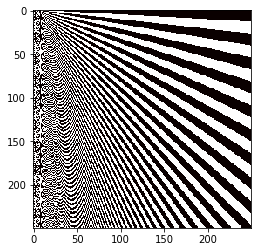

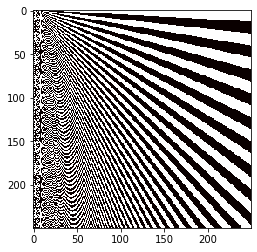

In [8]:
n = 250
gen_a = gen_sq_matrix()
gen_a.ones(n)
gen_a.scalar(1)


gen_a.fapply_2d(lambda e, x, y: np.ceil(np.sin(x/y * 180/np.pi))%2==0)
gen_a.get_heatmap('hot')

gen_a.fapply_2d(lambda e, x, y: np.floor(np.sin(x/y * 180/np.pi))%2==0)
gen_a.get_heatmap('hot')

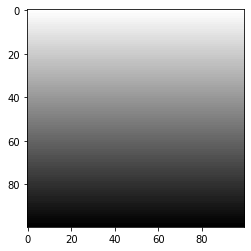

In [18]:
cols = 100
amp = 1
sig_x, sig_y = [cols*(cols/10)/2, cols*(cols/10)/2]
x_0, y_0 = [cols/2, cols/2]

M = gen_sq_matrix()
M.ones(cols)
M.fapply_2d(lambda e, x, y: x)
M = M.to_mat()
M.get_heatmap()